In [5]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.8.0+cpu'

Create some known data using linear regression.

Make a line with known parameter.

In [6]:
# known params
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Now we need a nn to accurately predict output y. We know it because its weight * X + Bias.
To do this lets establish our sets...

In [7]:
# We need to make sure data is split into training and test sets!
# Training set - Validation set - Test set

# Implement an 80/20 train test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

def plot_predictions(train_data=X_train, train_labels=y_train,
                     test_data=X_test, test_labels=y_test,
                     predictions=None):
    """
    Plots training and test predictions.
    """
    plt.figure(figsize=(12, 8))

    plt.scatter(train_data, train_labels, c="b", s=4, label="training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="test data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

    plt.legend(prop={'size': 14})

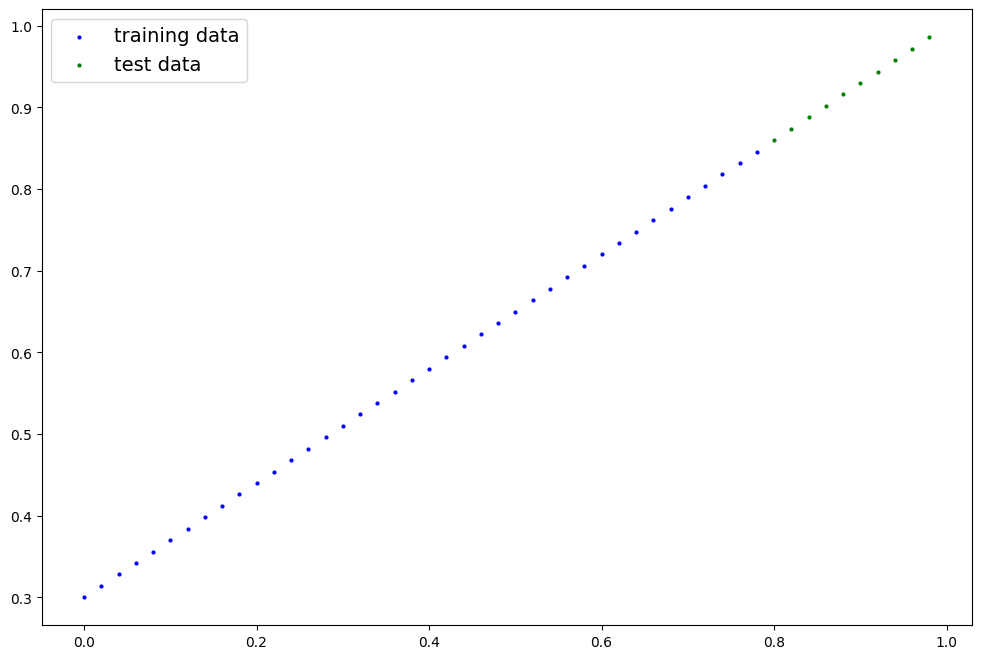

In [8]:
plot_predictions()

In [ ]:
# Building our first model
# Specifically a linear regression model
# using gradient decent and back propagation

class LinearRegressionModel(nn.Module):

    def __init__(self):
        super().__init__()

        # these random number should be updated to reflect the training data...
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float)) # A tensor that is a module param
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # forward method to define computation in model
    # you must overwrite forward in all nn.module subclasses
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # run training data thru regression and return result
        return self.weights * x + self.bias # linear regression